In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
train = pd.read_csv('titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Distribution by gender

**PieChart**

In [3]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf

In [4]:

init_notebook_mode(connected=True)

lab = train["Survived"].value_counts().keys().tolist() #labels
val = train["Survived"].value_counts().values.tolist() #values
trace = go.Pie(labels=lab, 
                values=val, 
                marker=dict(colors=['red']), 
                hoverinfo="value"                    # Seting values to 
              )
data = [trace]

#layout: you can plot title, x and y axis titles or show legends 
layout = go.Layout(title="Survived Distribution")    #set title
 
#figure: when you want to show on a graph, it takes the defined data and layout parameters
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [5]:
df = train

#### I change the Survived value for clarity, now on the charts, Survived is displayed: yes or no, not 1 or 0

In [6]:
train['Survived'].replace(1, "Yes",inplace=True)
train['Survived'].replace(0, "No",inplace=True)
train['Survived']

0       No
1      Yes
2      Yes
3      Yes
4       No
5       No
6       No
7       No
8      Yes
9      Yes
10     Yes
11     Yes
12      No
13      No
14      No
15     Yes
16      No
17     Yes
18      No
19     Yes
20      No
21     Yes
22     Yes
23     Yes
24      No
25     Yes
26      No
27      No
28     Yes
29      No
      ... 
861     No
862    Yes
863     No
864     No
865    Yes
866    Yes
867     No
868     No
869    Yes
870     No
871    Yes
872     No
873     No
874    Yes
875    Yes
876     No
877     No
878     No
879    Yes
880    Yes
881     No
882     No
883     No
884     No
885     No
886     No
887    Yes
888     No
889    Yes
890     No
Name: Survived, Length: 891, dtype: object

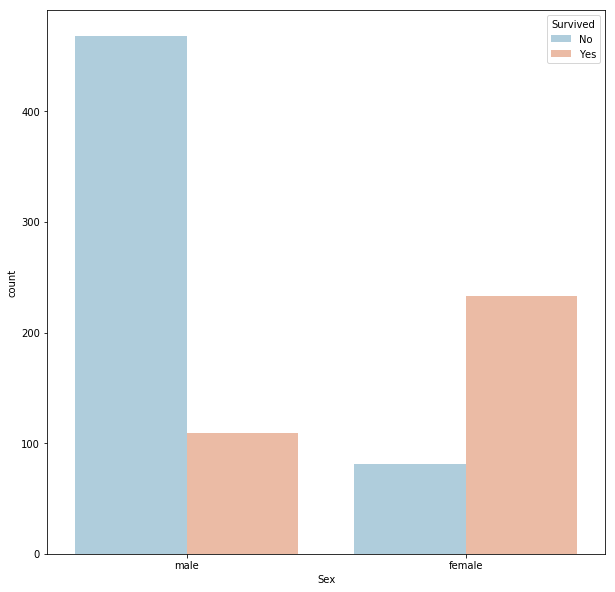

In [7]:
plt.subplots(figsize=(10,10))
sns.countplot('Sex',hue='Survived',data=train, palette='RdBu_r')
plt.show()

### 2. Distribution by age group

**histogram**

In [8]:
trace = go.Histogram(x=train['Age'],nbinsx=40,histnorm='percent') # defining data
data = [trace]
layout = go.Layout(title="Age Distribution")                
fig = go.Figure(data = data,layout = layout)                   # defining figure and plotting
iplot(fig)

#### I've divided passengers into five age groups: 0-16, 16-32, 32-48, 48-64 and 64-81

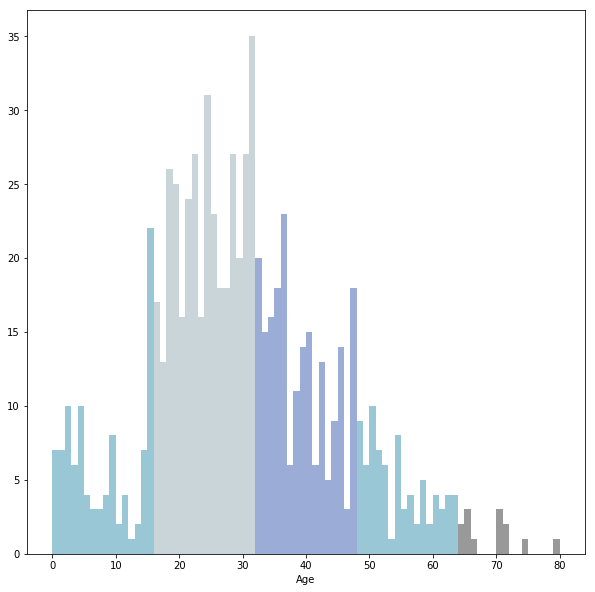

In [9]:
plt.figure(figsize=[10,10])
sns.distplot(train['Age'].dropna().values, bins=range(0,17), kde=False, color="#007598")
sns.distplot(train['Age'].dropna().values, bins=range(16, 33), kde=False, color="#7B97A0")
sns.distplot(train['Age'].dropna().values, bins=range(32, 49), kde=False, color="#06319B")
sns.distplot(train['Age'].dropna().values, bins=range(48,65), kde=False, color="#007598")
sns.distplot(train['Age'].dropna().values, bins=range(64,81), kde=False, color="#000000",
            axlabel='Age')
plt.show()

In [10]:
y=[]
fare = []
for i in list(df['Pclass'].unique()):
    result = df[df['Pclass']==i]['Age'].mean()
    fares = df[df['Pclass']==i]['Fare'].mean()
    y.append(result)
    fare.append(fares)
 
#defining data
trace = go.Bar(x = list(df['Pclass'].unique()),y=y,marker=dict(color=fare,colorscale='Viridis',showscale=True),text = fare)
data=[trace]
#defining layout
layout = go.Layout(title='Age/Fare vs Pclass Bar Chart',xaxis=dict(title='Pclass'),yaxis=dict(title='Age'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

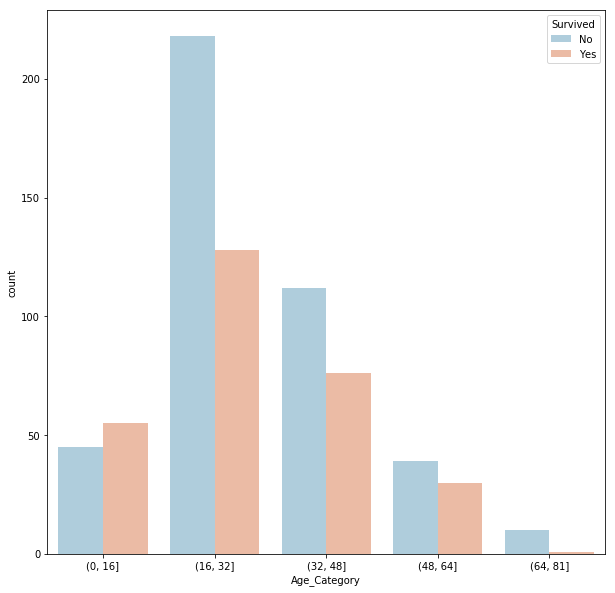

In [11]:
train['Age_Category'] = pd.cut(train['Age'],
                        bins=[0,16,32,48,64,81])
plt.subplots(figsize=(10,10))
sns.countplot('Age_Category',hue='Survived',data=train, palette='RdBu_r')
plt.show()

In [12]:
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,No,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,"(16, 32]"
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,"(32, 48]"
2,3,Yes,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16, 32]"
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,"(32, 48]"
4,5,No,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,"(32, 48]"


### 3. Create a column "Family"which will store the number of family members who travel together (you need to add Parch and SibSp)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,No,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,"(16, 32]"
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,"(32, 48]"
2,3,Yes,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16, 32]"
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,"(32, 48]"
4,5,No,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,"(32, 48]"


In [14]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
train['Alone'] = 0
train.loc[train['Family'] == 1, 'Alone'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone
0,1,No,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,"(16, 32]",2,0
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,"(32, 48]",2,0
2,3,Yes,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16, 32]",1,1
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,"(32, 48]",2,0
4,5,No,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,"(32, 48]",1,1


In [15]:
train['Sex'].replace("male", 0, inplace=True)
train['Sex'].replace("female", 1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone
0,1,No,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,"(16, 32]",2,0
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,"(32, 48]",2,0
2,3,Yes,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16, 32]",1,1
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,"(32, 48]",2,0
4,5,No,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,"(32, 48]",1,1


### 4.Divide the cost of tickets into 4 categories.

In [16]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['FareBand'] = pd.qcut(train['Fare'], 4)
#print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

In [17]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone,FareBand
0,1,No,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0,NaN,S,"(16, 32]",2,0,"(-0.001, 7.91]"
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3,C85,C,"(32, 48]",2,0,"(31.0, 512.329]"
2,3,Yes,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,1,NaN,S,"(16, 32]",1,1,"(7.91, 14.454]"
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,3,C123,S,"(32, 48]",2,0,"(31.0, 512.329]"
4,5,No,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,1,NaN,S,"(32, 48]",1,1,"(7.91, 14.454]"


#### Replace in the Embarked column from 'S' to 0, 'C' to 1, 'Q' to 2

In [18]:
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone,FareBand
0,1,No,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0,NaN,0,"(16, 32]",2,0,"(-0.001, 7.91]"
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3,C85,1,"(32, 48]",2,0,"(31.0, 512.329]"
2,3,Yes,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,1,NaN,0,"(16, 32]",1,1,"(7.91, 14.454]"
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,3,C123,0,"(32, 48]",2,0,"(31.0, 512.329]"
4,5,No,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,1,NaN,0,"(32, 48]",1,1,"(7.91, 14.454]"


#### Remove columns that don't correlate with Survival:

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone,FareBand
0,1,No,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0,NaN,0,"(16.0, 32.0]",2,0,"(-0.001, 7.91]"
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3,C85,1,"(32.0, 48.0]",2,0,"(31.0, 512.329]"
2,3,Yes,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,1,NaN,0,"(16.0, 32.0]",1,1,"(7.91, 14.454]"
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,3,C123,0,"(32.0, 48.0]",2,0,"(31.0, 512.329]"
4,5,No,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,1,NaN,0,"(32.0, 48.0]",1,1,"(7.91, 14.454]"
5,6,No,3,"Moran, Mr. James",0,NaN,0,0,330877,1,NaN,2,NaN,1,1,"(7.91, 14.454]"
6,7,No,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,3,E46,0,"(48.0, 64.0]",1,1,"(31.0, 512.329]"
7,8,No,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,2,NaN,0,"(0.0, 16.0]",5,0,"(14.454, 31.0]"
8,9,Yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,1,NaN,0,"(16.0, 32.0]",3,0,"(7.91, 14.454]"
9,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,2,NaN,1,"(0.0, 16.0]",2,0,"(14.454, 31.0]"


In [20]:
train = train.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'PassengerId', 'Age_Category', 'FareBand'], axis=1)

In [21]:
train['Age'] = train['Age'].fillna(2)
train['Age'] = train['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Alone
0,No,3,0,1,0,0,2,0
1,Yes,1,1,2,3,1,2,0
2,Yes,3,1,1,1,0,1,1
3,Yes,1,1,2,3,0,2,0
4,No,3,0,2,1,0,1,1


In [22]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Alone
0,No,3,0,1,0,0,2,0
1,Yes,1,1,2,3,1,2,0
2,Yes,3,1,1,1,0,1,1
3,Yes,1,1,2,3,0,2,0
4,No,3,0,2,1,0,1,1
5,No,3,0,2,1,2,1,1
6,No,1,0,3,3,0,1,1
7,No,3,0,0,2,0,5,0
8,Yes,3,1,1,1,0,3,0
9,Yes,2,1,0,2,1,2,0


### 5. Divide the dataset in random order into training and test in proportions (80 by 20).

In [23]:
train['Survived'].replace("Yes", 1,inplace=True)
train['Survived'].replace("No", 0,inplace=True)

In [24]:
training, testing = train_test_split(train, test_size=0.2, random_state=0)

In [25]:
cols = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family', 'Alone']
tcols = np.append(['Survived'],cols)
df = training.loc[:,tcols].dropna()

X = df.loc[:,cols]
y = np.ravel(df.loc[:,['Survived']])

df_test = testing.loc[:,tcols].dropna()
X_test = df_test.loc[:,cols]
y_test = np.ravel(df_test.loc[:,['Survived']])

### 6.Models:

In [26]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_test, y_test)*100, 2)
acc_random_forest

/home/ai4u/build/anaconda2/envs/tf_built/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



83.24

In [27]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_random_forest)
rp = classification_report(y_pred = y_pred_random_forest, y_true = y_test)
print(cm)
print(rp)

[[99 11]
 [19 50]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

   micro avg       0.83      0.83      0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [28]:
?SVC

Object `SVC` not found.


In [29]:
#SVM
from sklearn.svm import SVC, LinearSVC
clf = SVC(kernel='rbf', gamma=100, C=0.5)
clf.fit(X, y)
y_pred_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_test, y_test) * 100, 2)
print (acc_linear_svc)

82.12


In [30]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_test, y_test) * 100, 2)
acc_log_reg

/home/ai4u/build/anaconda2/envs/tf_built/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



79.33

In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 'Random Forest'],
    'Score': [acc_log_reg, acc_linear_svc, acc_random_forest]})

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,83.24
1,Linear SVC,82.12
0,Logistic Regression,79.33
